In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
%matplotlib inline

np.random.seed(0)
torch.manual_seed(0)

In [2]:
""" 
Group member: 
Michelle Karen Natasya Putri SANDHIKA 18078659d
Randall NICHOLAS 18079343D
Nicholas Matthew KURNIADI 18079267D
"""

' \nGroup member: \nMichelle Karen Natasya Putri SANDHIKA 18078659d\nRandall NICHOLAS 18079343D\nNicholas Matthew KURNIADI 18079267D\n'

Step 1: Read in Iris Data

In [3]:
#read in Iris Data

iris = datasets.load_iris()
X=     iris.data[:,:]
y=     iris.target

Step 2: Train test split

In [4]:
# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# Transfer to torch tensor 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Step 3: Build your network (The structure of the ANN is totally flexible, you can choose different hidden layers, different neurons, different activation functions as long as you are satisfied with test accuracy in step 5.)

Option 1: create an ANN class (If you are familiar with constructing a class, I would suggest you to construct your ANN using a class.)

In [6]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
    
model = ANN()
model

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

Step 4: Train the network and draw the training loss and training accuracy plot

In [7]:
##define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch: 0 Loss: 1.0590524673461914
Epoch: 10 Loss: 0.674526572227478
Epoch: 20 Loss: 0.3688047528266907
Epoch: 30 Loss: 0.20194773375988007
Epoch: 40 Loss: 0.10003627836704254
Epoch: 50 Loss: 0.060393303632736206
Epoch: 60 Loss: 0.046141915023326874
Epoch: 70 Loss: 0.039530254900455475
Epoch: 80 Loss: 0.03572344407439232
Epoch: 90 Loss: 0.033203549683094025


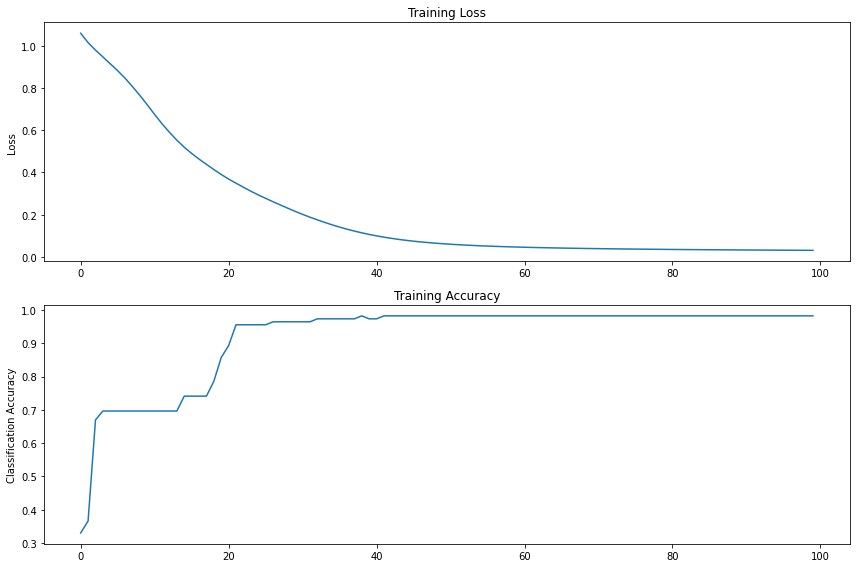

Wall time: 403 ms


In [8]:
%%time
epochs = 100
train_loss = []
train_accuracy = []

for i in range(epochs):
    y_hat =        model.forward(X_train)
    loss =         criterion(y_hat, y_train)
    
    y_hat_class = torch.argmax(y_hat, dim=1)
    correct_prediction = (y_train == y_hat_class).float().sum()
    accuracy = correct_prediction / len(y_train)
    
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

#plot the training loss and training accuracy
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

Step 5: Test Accuracy on test data

In [9]:
y_hat_test = model.forward(X_test)
y_hat_test_class = torch.argmax(y_hat_test, dim=1)

correct_prediction = (y_test == y_hat_test_class).float().sum()
test_accuracy = correct_prediction / len(y_test)  

print("Test Accuracy {:.2f}".format(test_accuracy))

Test Accuracy 0.97
